In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import zscore
from scipy.stats import kurtosis
import seaborn as sns
df=pd.read_csv(r"C:\Users\Asus\Documents\prj\LinkedIn data analysis\Linkedin dataset.csv")
df

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,med_salary,min_salary,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,Unnamed: 27,Unnamed: 28
0,3905299252,AMETEK,Continuous Improvement Specialist,120000.0,YEARLY,"Garden City, NY",8086,4.0,NaN,90000.00,...,Entry level,NaN,1.710000e+12,188100.jobs2web.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
1,3904956043,Paylocity,Enterprise HCM Account Executive,125000.0,YEARLY,"Orlando, FL",24614,14.0,NaN,100000.00,...,Mid-Senior level,NaN,1.710000e+12,2000recruiting.paylocity.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
2,3906223649,Paylocity,Senior Human Resources Business Partner,115000.0,YEARLY,United States,24614,2.0,NaN,98000.00,...,Mid-Senior level,NaN,1.710000e+12,2000recruiting.paylocity.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
3,3905301424,Paylocity,HCM Account Executive,105000.0,YEARLY,"Chicago, IL",24614,4.0,NaN,60000.00,...,Mid-Senior level,NaN,1.710000e+12,2000recruiting.paylocity.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
4,3904948759,Paylocity,Implementation Analyst I,60528.0,YEARLY,"Lake Mary, FL",24614,24.0,NaN,39520.00,...,Mid-Senior level,NaN,1.710000e+12,2000recruiting.paylocity.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,3905828598,Zillow,Coaching and Development Program Manager,97200.0,YEARLY,United States,13990,23.0,NaN,60800.00,...,Mid-Senior level,NaN,1.710000e+12,zillow.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
13263,3905825885,Zillow,Senior Account Advisor,56.2,HOURLY,United States,13990,5.0,NaN,35.15,...,Mid-Senior level,NaN,1.710000e+12,zillow.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
13264,3900084683,Ziply Fiber,"Sales Account Executive, Multi-Family Communities",50000.0,YEARLY,"Everett, WA",34755301,12.0,NaN,30000.00,...,Mid-Senior level,NaN,1.710000e+12,ziplyfiber.zohorecruit.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN
13265,3900084691,Ziply Fiber,Sales Account Executive,50000.0,YEARLY,"Coeur d'Alene, ID",34755301,6.0,NaN,30000.00,...,Mid-Senior level,NaN,1.710000e+12,ziplyfiber.zohorecruit.com,0,FULL_TIME,USD,BASE_SALARY,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13267 entries, 0 to 13266
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      13267 non-null  int64  
 1   company_name                13267 non-null  object 
 2   title                       13267 non-null  object 
 3   max_salary                  13267 non-null  float64
 4   pay_period                  13267 non-null  object 
 5   location                    13267 non-null  object 
 6   company_id                  13267 non-null  int64  
 7   views                       13240 non-null  float64
 8   med_salary                  0 non-null      float64
 9   min_salary                  13267 non-null  float64
 10  formatted_work_type         13267 non-null  object 
 11  applies                     1846 non-null   float64
 12  original_listed_time        13267 non-null  float64
 13  remote_allowed              157

In [3]:
df.shape

(13267, 27)

In [4]:
df.columns

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'med_salary', 'min_salary',
       'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [5]:
df.isnull().sum()

job_id                            0
company_name                      0
title                             0
max_salary                        0
pay_period                        0
location                          0
company_id                        0
views                            27
med_salary                    13267
min_salary                        0
formatted_work_type               0
applies                       11421
original_listed_time              0
remote_allowed                11697
job_posting_url                   0
application_url                 629
application_type                  0
expiry                            0
closed_time                   13222
formatted_experience_level        0
skills_desc                   13079
listed_time                       0
posting_domain                    0
sponsored                         0
work_type                         0
currency                          0
compensation_type                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df2=df.drop(['med_salary','expiry','closed_time','listed_time','sponsored','work_type','original_listed_time','closed_time'],axis=1)
df2

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,min_salary,formatted_work_type,applies,remote_allowed,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,currency,compensation_type
0,3905299252,AMETEK,Continuous Improvement Specialist,120000.0,YEARLY,"Garden City, NY",8086,4.0,90000.00,Full-time,1.0,NaN,https://www.linkedin.com/jobs/view/3905299252/...,https://188100.jobs2web.com/job/Garden-City-Co...,OffsiteApply,Entry level,NaN,188100.jobs2web.com,USD,BASE_SALARY
1,3904956043,Paylocity,Enterprise HCM Account Executive,125000.0,YEARLY,"Orlando, FL",24614,14.0,100000.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3904956043/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,NaN,2000recruiting.paylocity.com,USD,BASE_SALARY
2,3906223649,Paylocity,Senior Human Resources Business Partner,115000.0,YEARLY,United States,24614,2.0,98000.00,Full-time,NaN,1.0,https://www.linkedin.com/jobs/view/3906223649/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,NaN,2000recruiting.paylocity.com,USD,BASE_SALARY
3,3905301424,Paylocity,HCM Account Executive,105000.0,YEARLY,"Chicago, IL",24614,4.0,60000.00,Full-time,NaN,1.0,https://www.linkedin.com/jobs/view/3905301424/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,NaN,2000recruiting.paylocity.com,USD,BASE_SALARY
4,3904948759,Paylocity,Implementation Analyst I,60528.0,YEARLY,"Lake Mary, FL",24614,24.0,39520.00,Full-time,3.0,NaN,https://www.linkedin.com/jobs/view/3904948759/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,NaN,2000recruiting.paylocity.com,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,3905828598,Zillow,Coaching and Development Program Manager,97200.0,YEARLY,United States,13990,23.0,60800.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3905828598/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,NaN,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13263,3905825885,Zillow,Senior Account Advisor,56.2,HOURLY,United States,13990,5.0,35.15,Full-time,NaN,1.0,https://www.linkedin.com/jobs/view/3905825885/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,NaN,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13264,3900084683,Ziply Fiber,"Sales Account Executive, Multi-Family Communities",50000.0,YEARLY,"Everett, WA",34755301,12.0,30000.00,Full-time,NaN,NaN,https://www.linkedin.com/jobs/view/3900084683/...,https://ziplyfiber.zohorecruit.com/recruit/Por...,OffsiteApply,Mid-Senior level,NaN,ziplyfiber.zohorecruit.com,USD,BASE_SALARY
13265,3900084691,Ziply Fiber,Sales Account Executive,50000.0,YEARLY,"Coeur d'Alene, ID",34755301,6.0,30000.00,Full-time,NaN,NaN,https://www.linkedin.com/jobs/view/3900084691/...,https://ziplyfiber.zohorecruit.com/recruit/Por...,OffsiteApply,Mid-Senior level,NaN,ziplyfiber.zohorecruit.com,USD,BASE_SALARY


In [8]:
df2.columns

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'min_salary', 'formatted_work_type',
       'applies', 'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'formatted_experience_level', 'skills_desc',
       'posting_domain', 'currency', 'compensation_type'],
      dtype='object')

In [9]:
df2['remote_allowed'].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_174264\189472368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['remote_allowed'].fillna(0,inplace=True)


In [10]:
df2['skills_desc'].fillna('skills related to field',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_174264\1608357351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['skills_desc'].fillna('skills related to field',inplace=True)


In [11]:
df2.fillna(method='ffill',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_174264\3698405888.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill',inplace=True)


In [12]:
df2

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,min_salary,formatted_work_type,applies,remote_allowed,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,currency,compensation_type
0,3905299252,AMETEK,Continuous Improvement Specialist,120000.0,YEARLY,"Garden City, NY",8086,4.0,90000.00,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3905299252/...,https://188100.jobs2web.com/job/Garden-City-Co...,OffsiteApply,Entry level,skills related to field,188100.jobs2web.com,USD,BASE_SALARY
1,3904956043,Paylocity,Enterprise HCM Account Executive,125000.0,YEARLY,"Orlando, FL",24614,14.0,100000.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3904956043/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,skills related to field,2000recruiting.paylocity.com,USD,BASE_SALARY
2,3906223649,Paylocity,Senior Human Resources Business Partner,115000.0,YEARLY,United States,24614,2.0,98000.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3906223649/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,skills related to field,2000recruiting.paylocity.com,USD,BASE_SALARY
3,3905301424,Paylocity,HCM Account Executive,105000.0,YEARLY,"Chicago, IL",24614,4.0,60000.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3905301424/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,skills related to field,2000recruiting.paylocity.com,USD,BASE_SALARY
4,3904948759,Paylocity,Implementation Analyst I,60528.0,YEARLY,"Lake Mary, FL",24614,24.0,39520.00,Full-time,3.0,0.0,https://www.linkedin.com/jobs/view/3904948759/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,skills related to field,2000recruiting.paylocity.com,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,3905828598,Zillow,Coaching and Development Program Manager,97200.0,YEARLY,United States,13990,23.0,60800.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3905828598/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13263,3905825885,Zillow,Senior Account Advisor,56.2,HOURLY,United States,13990,5.0,35.15,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3905825885/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13264,3900084683,Ziply Fiber,"Sales Account Executive, Multi-Family Communities",50000.0,YEARLY,"Everett, WA",34755301,12.0,30000.00,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3900084683/...,https://ziplyfiber.zohorecruit.com/recruit/Por...,OffsiteApply,Mid-Senior level,skills related to field,ziplyfiber.zohorecruit.com,USD,BASE_SALARY
13265,3900084691,Ziply Fiber,Sales Account Executive,50000.0,YEARLY,"Coeur d'Alene, ID",34755301,6.0,30000.00,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3900084691/...,https://ziplyfiber.zohorecruit.com/recruit/Por...,OffsiteApply,Mid-Senior level,skills related to field,ziplyfiber.zohorecruit.com,USD,BASE_SALARY


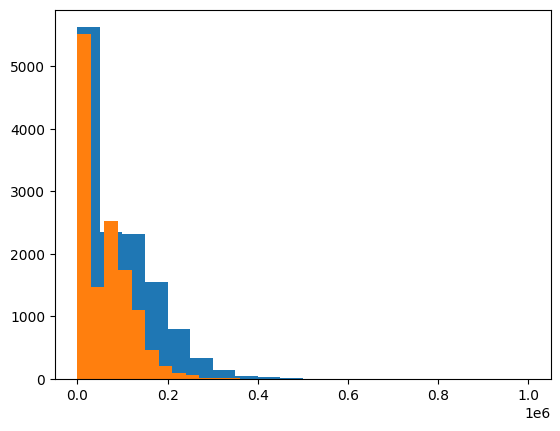

In [13]:
plt.hist(df2['max_salary'], bins=20)

plt.hist(df2['min_salary'], bins=20)

plt.show()
# Observations:
# Distribution of Salaries: The histogram depicts the distribution of both minimum and maximum salaries within a dataset.
# Skewness: The distribution of both minimum and maximum salaries is right-skewed, indicating that a majority of the salaries are concentrated in the lower range, with a few outliers extending towards higher salaries.
# Range of Salaries: The maximum salary appears to be significantly higher than the maximum minimum salary, suggesting a wide range of salary variations within the dataset.
# Overlapping Distribution: There is an overlap between the distributions of minimum and maximum salaries, indicating that some job postings have a relatively small salary range.

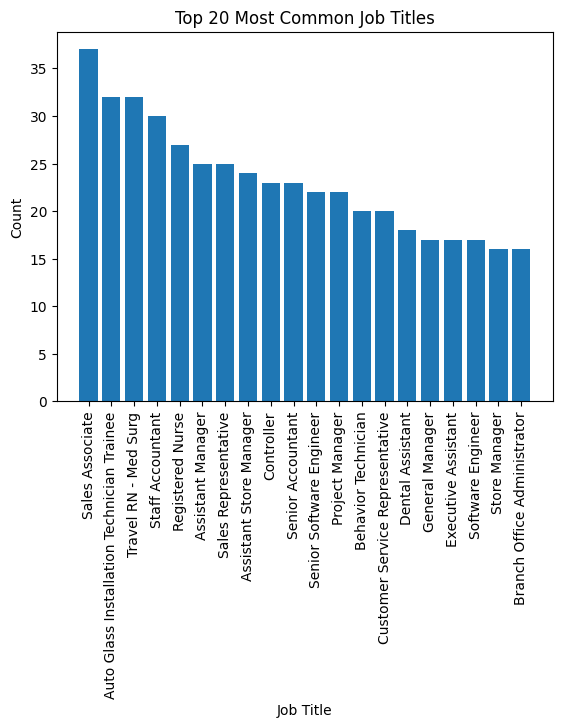

In [14]:
title_counts=df['title'].value_counts().head(20)

plt.bar(title_counts.index, title_counts.values)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Job Titles')
plt.show()
# Conclusion
# The bar chart visualizes the frequency distribution of the top 20 most common job titles within a given dataset.

# Key Observations:

# Sales Associate is the most frequently occurring job title, followed by Information Technician Trainee.
# The frequency of job titles decreases rapidly after the top few positions, indicating a long tail in the distribution.
# The dataset appears to be dominated by entry-level or junior-level positions, as evidenced by titles like "Trainee," "Assistant," and "Associate."

In [15]:
df2['location'].unique()
df2['location'].value_counts()

location
United States           719
New York, NY            680
Seattle, WA             231
Los Angeles, CA         229
San Francisco, CA       212
                       ... 
Lake Buena Vista, FL      1
Wesley Chapel, FL         1
Plainfield, IN            1
Timmonsville, SC          1
Holtsville, NY            1
Name: count, Length: 2591, dtype: int64

In [16]:
usd=pd.DataFrame(df2[df2['location']=='United States'])
usd


,job_id,company_name,title,max_salary,pay_period,location,company_id,views,min_salary,formatted_work_type,applies,remote_allowed,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,currency,compensation_type
2,3906223649,Paylocity,Senior Human Resources Business Partner,115000.0,YEARLY,United States,24614,2.0,98000.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3906223649/...,https://2000recruiting.paylocity.com/Recruitin...,OffsiteApply,Mid-Senior level,skills related to field,2000recruiting.paylocity.com,USD,BASE_SALARY
6,3895811054,Andreessen Horowitz,"Contractor, Operations Specialist, Crypto",60.0,HOURLY,United States,439909,10.0,55.00,Contract,1.0,1.0,https://www.linkedin.com/jobs/view/3895811054/...,https://a16z.com/about/jobs/?gh_jid=5951701003,OffsiteApply,Entry level,skills related to field,a16z.com,USD,BASE_SALARY
12,3903815405,Fandom,CRM Manager,130000.0,YEARLY,United States,157252,8.0,78000.00,Full-time,2.0,1.0,https://www.linkedin.com/jobs/view/3903815405/...,https://about.fandom.com/careers/listing/59012...,OffsiteApply,Mid-Senior level,skills related to field,about.fandom.com,USD,BASE_SALARY
54,3906254725,American Electric Power,Project Solutions Architect - Architect Senior,104267.5,YEARLY,United States,162419,3.0,83413.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3906254725/...,https://aep.wd1.myworkdayjobs.com/AEPCareerSit...,OffsiteApply,Mid-Senior level,skills related to field,aep.wd1.myworkdayjobs.com,USD,BASE_SALARY
152,3904937937,Amplify,Tutoring Launch Specialist (Contractor),30.0,HOURLY,United States,2684883,52.0,21.00,Full-time,4.0,1.0,https://www.linkedin.com/jobs/view/3904937937/...,https://amplify.wd1.myworkdayjobs.com/Amplify_...,OffsiteApply,Entry level,skills related to field,amplify.wd1.myworkdayjobs.com,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13259,3906091745,Zillow,"Manager, National Acquisition",146400.0,YEARLY,United States,13990,43.0,91600.00,Full-time,156.0,1.0,https://www.linkedin.com/jobs/view/3906091745/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13260,3906087997,Zillow,Seller Partner Operations Program Manager,139000.0,YEARLY,United States,13990,677.0,87000.00,Full-time,16.0,1.0,https://www.linkedin.com/jobs/view/3906087997/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13261,3905353304,Zillow,Seller Partner Operations Specialist,97200.0,YEARLY,United States,13990,23.0,60800.00,Full-time,16.0,1.0,https://www.linkedin.com/jobs/view/3905353304/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY
13262,3905828598,Zillow,Coaching and Development Program Manager,97200.0,YEARLY,United States,13990,23.0,60800.00,Full-time,1.0,1.0,https://www.linkedin.com/jobs/view/3905828598/...,https://zillow.wd5.myworkdayjobs.com/Zillow_Gr...,OffsiteApply,Mid-Senior level,skills related to field,zillow.wd5.myworkdayjobs.com,USD,BASE_SALARY


In [17]:
usd['max_salary'].max()


800000.0

In [18]:
usd['max_salary'].min()

18.0

pay_period
YEARLY    615
HOURLY    104
Name: count, dtype: int64


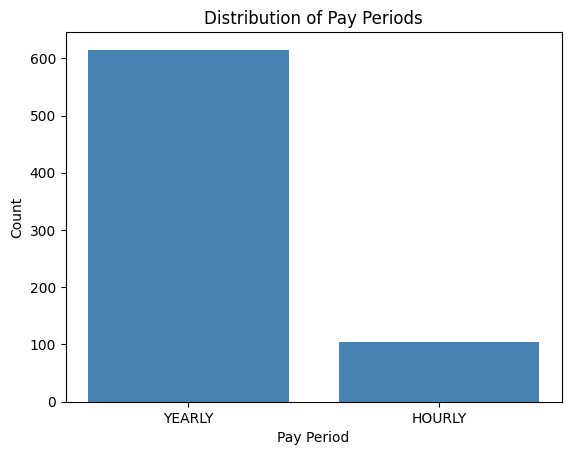

In [19]:
usd['pay_period'].unique()
value_counts = usd['pay_period'].value_counts()
print(value_counts)
plt.bar(value_counts.index, value_counts.values,color='steelblue')
plt.xlabel('Pay Period')
plt.ylabel('Count')
plt.title('Distribution of Pay Periods')
plt.show()
# Conclusion
# Based on the provided bar chart, the overwhelming majority of job postings in the dataset have a yearly pay period. This is evident by the significantly taller bar representing "YEARLY" compared to the "HOURLY" pay period.
# This finding suggests that annual salaries are the predominant compensation structure within the analyzed job postings.

In [20]:
df2['title'].unique()
df2['title'].value_counts()

title
Sales Associate                                                   37
Auto Glass Installation Technician Trainee                        32
Travel RN - Med Surg                                              32
Staff Accountant                                                  30
Registered Nurse                                                  27
                                                                  ..
Billing Specialist - Summer '24                                    1
Delta Professional Services Non-Seniority List Instructor          1
Deputy Sheriff August 2024 Academy - Denver Sheriff Department     1
Art and Exhibit Program Administrator                              1
Sales Account Executive, Multi-Family Communities                  1
Name: count, Length: 10387, dtype: int64

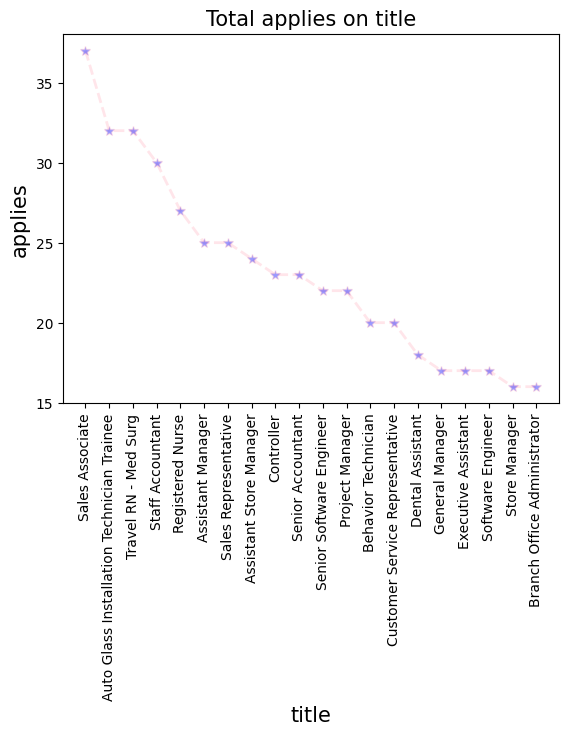

In [21]:
aa=df['title'].value_counts().head(20)
plt.plot(aa.index,aa.values,color='pink',linewidth=2,marker='*',linestyle='dashed',markerfacecolor='blue',markersize=7,alpha=0.4)
plt.xlabel("title",fontsize=15)
plt.ylabel("applies",fontsize=15)
plt.title("Total applies on title",fontsize=15)
plt.xticks(rotation=90)
plt.show()
# Conclusion
# The plot visualizes the relationship between job titles and the number of applications received.
# Key Observations:
# There's a clear downward trend in the number of applications as we move from the most common job titles to less common ones.
# A small number of job titles attract a significantly higher number of applications compared to others.
# The distribution is right-skewed, indicating that a few job titles dominate the applications.

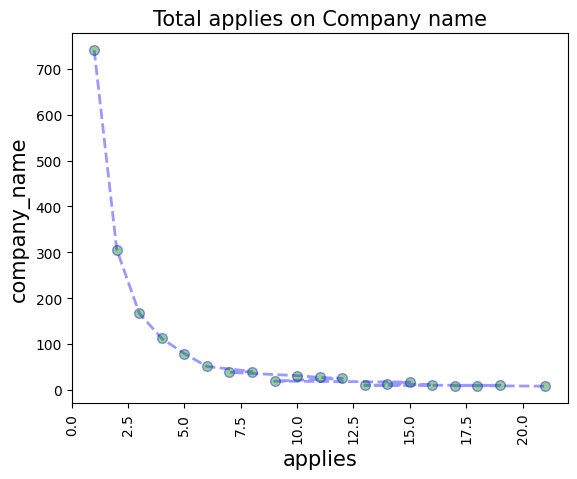

In [22]:
aa=df['applies'].value_counts().head(20)
plt.plot(aa.index,aa.values,color='blue',linewidth=2,marker='o',linestyle='dashed',markerfacecolor='green',markersize=7,alpha=0.4)
plt.xlabel("applies",fontsize=15)
plt.ylabel("company_name",fontsize=15)
plt.title("Total applies on Company name",fontsize=15)
plt.xticks(rotation=90)
plt.show()

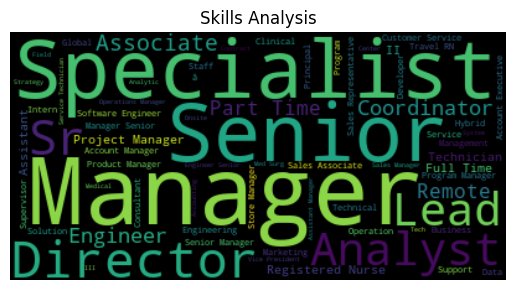

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(df2['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Skills Analysis')
plt.show()

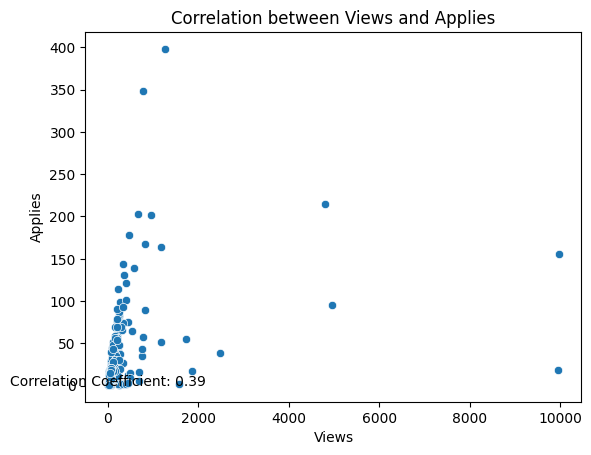

In [24]:
# Calculate the correlation between views and applies
corr_coef = df['views'].corr(df['applies'])

# Plot a scatter plot
sns.scatterplot(x='views', y='applies', data=df)
plt.title('Correlation between Views and Applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.text(0.5, 0.5, f'Correlation Coefficient: {corr_coef:.2f}', ha='center')
plt.show()
#This code will generate a scatter plot showing the correlation between views and applies, along with the correlation coefficient.

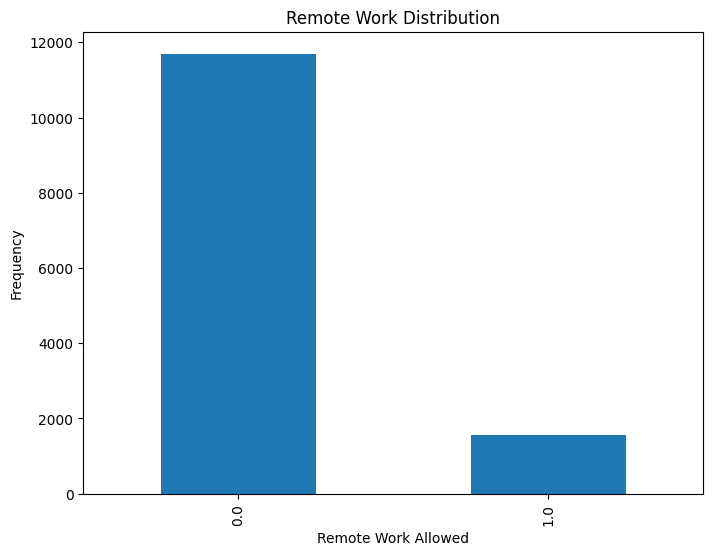

In [25]:
#Remote Work Distribution
remote_work_counts = df2['remote_allowed'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
remote_work_counts.plot(kind='bar')
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Allowed')
plt.ylabel('Frequency')
plt.show()
#This code will generate a bar chart showing the frequency of remote work allowed.

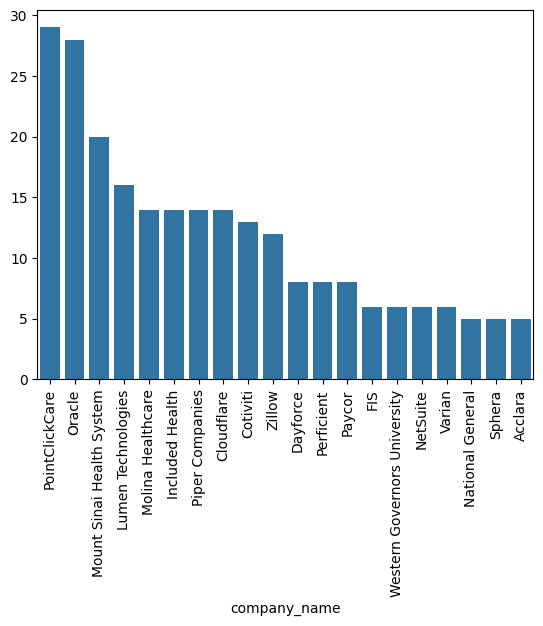

In [26]:
#listing companyes in usd
c_count=usd['company_name'].value_counts().head(20)
sns.barplot(x=c_count.index,y=c_count.values)
plt.xticks(rotation=90)
plt.show()